In [1]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
y_train[0]

1

In [4]:
max([max(sequence) for sequence in X_train])

9999

In [5]:
# Reverse dictionary mapping to decode word values
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

1646592/1641221 [==============================] - 0s 0us/step


In [38]:
decoded_review = ' '.join([reverse_word_index.get(i-3, "?") for i in X_train[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [42]:
# One-hot encoding training data so we have uniform inputs of size (10000,)

# bag of words classifier here, much more naive than word embeddings
# bag of words works surprisingly well
# tfidf is also a thing (measuring rarity of word, frequency measure, how salient is a word (e.g. the, a, and - appear a lot and are weighted less in vector))
# e.g. consider dinosaur, not frequent in corpus but if frequent in single sample it will be heavily weighted
# look at googles word2vec to see context and semantic meaning, glove, word embeddings in general
# 300 dimensional vector for every
# explicit semantic analysis (ESA) better than word2vec
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
    
X_train_vector = vectorize_sequences(X_train)
X_test_vector = vectorize_sequences(X_test)
print(X_train_vector[0])
print(X_test_vector[0])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [78]:
# Already 1s and 0s, just convert to float32
y_train_vector = np.asarray(y_train).astype('float32')
y_test_vector = np.asarray(y_test).astype('float32')

In [46]:
y_train_vector

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(1, activation='sigmoid', input_shape=(10000,)))

model.compile(loss="binary_crossentropy", optimizer=RMSprop(lr=0.001), metrics=["accuracy"])

In [48]:
# Creating validation set from training
X_val = X_train_vector[:10000]
partial_X_train = X_train_vector[10000:]

y_val = y_train_vector[:10000]
partial_y_train = y_train_vector[10000:]

In [49]:
hist = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 12s 789us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_a

In [51]:
hist.history.keys()

dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])

In [55]:
acc = hist.history["acc"]
val_acc = hist.history["val_acc"]
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

epochs = range(1, len(acc)+1)

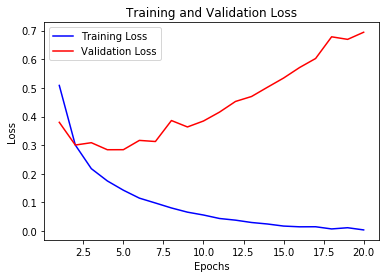

In [71]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss, "b", label="Training Loss") # "bo" == 'b' for blue, 'o' for dots instead of a line
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

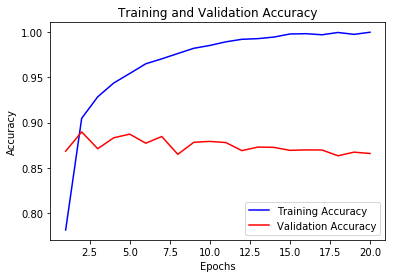

In [72]:
plt.plot(epochs, acc, "b", label="Training Accuracy") # "bo" == 'b' for blue, 'o' for dots instead of a line
plt.plot(epochs, val_acc, "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [79]:
# We can see model is obviously overfit around 3 or 4 epochs, will see improved performance in testing if we stop training here
hist = model.fit(partial_X_train, partial_y_train, epochs=4,batch_size=512, validation_data=(X_val, y_val))
# print(X_test)
results = model.evaluate(X_test_vector, y_test_vector)
print("Loss: "results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 95us/step - loss: 4.7304e-04 - acc: 1.0000 - val_loss: 0.9305 - val_acc: 0.8626
Epoch 2/4
15000/15000 [==============================] - 1s 95us/step - loss: 4.0249e-04 - acc: 1.0000 - val_loss: 0.9862 - val_acc: 0.8575
Epoch 3/4
15000/15000 [==============================] - 1s 91us/step - loss: 0.0038 - acc: 0.9985 - val_loss: 0.9987 - val_acc: 0.8611
Epoch 4/4
25000/25000 [==============================] - 2s 67us/step
[1.1179638742256164, 0.84272]
